In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,auc
from sklearn import metrics

# (1)
使用 sklearn.datasets.make_classification 随机生成一个由 1000 个样本组成的分类数据集，特征数为 4，共包含两个类别。有两种处理方式

In [7]:
sample=make_classification(n_samples=1000,n_features=4,n_classes=2)
new_sample=np.hstack((sample[0],sample[1][:,np.newaxis]))

In [8]:
feature,label=make_classification(n_samples=1000,n_features=4,n_classes=2)

第二种方式对后面的程序编写更方便。

# (2）
使用 sklearn.model_selection.train_test_split 构造训练集和测试集。

In [9]:
feature_train,feature_test,label_train,label_test=train_test_split(feature,label,test_size=0.3, train_size=0.7)

# (3)
使用 sklearn.tree.DecisionTreeClassifier 在训练集上训练得到一个决策树
模型 tree_clf，并使用 tree_clf 的 predict 函数预测测试样本的分类结果。

In [10]:
clf = DecisionTreeClassifier()
clf.fit(feature_train,label_train)
value_predict=clf.predict(feature_test)

# (4)
使用 tree_clf 的 score 函数获得决策树模型 tree_clf 的精度。

In [20]:
accuracy=clf.score(feature,label)

# (5)
使用 sklearn.metrics 中的 confusion_matrix、precision_score、recall_score、
f1_score 函数分别获得决策树模型 tree_clf 的混淆矩阵、查准率、查全率和 f1 值。

In [12]:
confu_matrix=confusion_matrix(label_test,value_predict)
score=precision_score(label_test,value_predict)
recall=recall_score(label_test,value_predict)
f1=f1_score(label_test,value_predict)

# (6)
使用 sklearn.metrics 中的 roc_curve 函数画出 ROC 曲线.由于取值只有0、1两种，所以只需选择0、1、2三个阈值。

<Figure size 432x288 with 0 Axes>

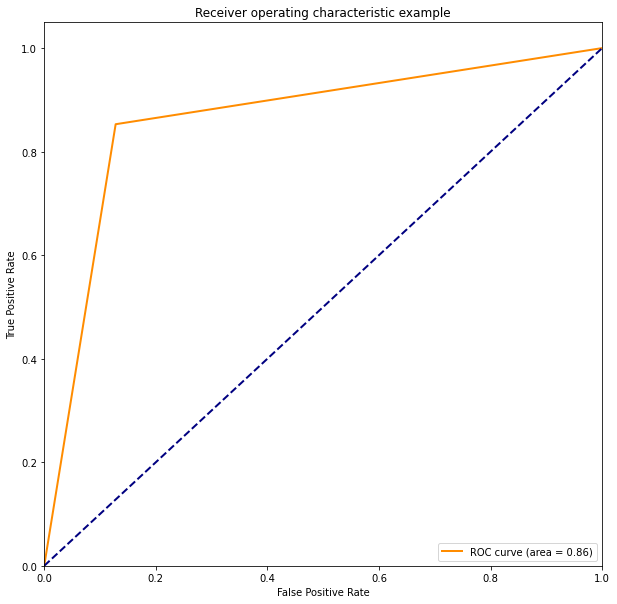

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(label_test, value_predict, pos_label=1)
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()